# Creating spectogram for each audio file

In [1]:
# load python libraries
%matplotlib inline
import numpy as np
import pandas as pd
import random
from scipy.io import wavfile
from sklearn.preprocessing import scale
import librosa.display
import librosa
import matplotlib.pyplot as plt
import os

E:\anaconda\envs\tensorflow\lib\site-packages\librosa\util\decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
E:\anaconda\envs\tensorflow\lib\site-packages\librosa\util\decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


## Function defination

In [2]:
def save_melspectrogram(directory_path, file_name, dataset_split, label, sampling_rate=44100):
    """ Will save spectogram into current directory"""
    
    path_to_file = os.path.join(directory_path, file_name)
    data, sr = librosa.load(path_to_file, sr=sampling_rate, mono=True)
    data = scale(data)

    melspec = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128)
    # Convert to log scale (dB) using the peak power (max) as reference
        # per suggestion from Librbosa: https://librosa.github.io/librosa/generated/librosa.feature.melspectrogram.html
    log_melspec = librosa.power_to_db(melspec, ref=np.max)  
    librosa.display.specshow(log_melspec, sr=sr)
    
    # create saving directory
    directory = './melspectrograms/{dataset}/{label}'.format(dataset=dataset_split, label=label)
    if not os.path.exists(directory):
        os.makedirs(directory)
    
    plt.savefig(directory + '/' + file_name.strip('.wav') + '.png')

In [3]:
def _train_test_split(filenames, train_pct):
    """Create train and test splits for ESC-50 data"""
    random.seed(2018)
    n_files = len(filenames)
    n_train = int(n_files*train_pct)
    train = np.random.choice(n_files, n_train, replace=False)
        
    # split on training indices
    training_idx = np.isin(range(n_files), train)
    training_set = np.array(filenames)[training_idx]
    testing_set = np.array(filenames)[~training_idx]

    
    return {'training': training_set, 'testing': testing_set}

In [4]:
dataset_dir = 'D:/ESC-50-master'

# Load meta data for audio files
meta_data = pd.read_csv('cough.csv')

labs = meta_data.is_cough
unique_labels = labs.unique()
meta_data.head()

,filename,is_cough
0,1-100032-A-0.wav,no_cough
1,1-100038-A-14.wav,no_cough
2,1-100210-A-36.wav,no_cough
3,1-100210-B-36.wav,no_cough
4,1-101296-A-19.wav,no_cough


## Main program 

Proccesing no_cough audio files


E:\anaconda\envs\tensorflow\lib\site-packages\sklearn\preprocessing\_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
E:\anaconda\envs\tensorflow\lib\site-packages\sklearn\preprocessing\_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
E:\anaconda\envs\tensorflow\lib\site-packages\sklearn\preprocessing\_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
E:\anaconda\envs\tensorflow\lib\site-packages\sklearn\preprocessing\_data.py:173: UserWarning: Numerical issues were e

Proccesing cough audio files


E:\anaconda\envs\tensorflow\lib\site-packages\sklearn\preprocessing\_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


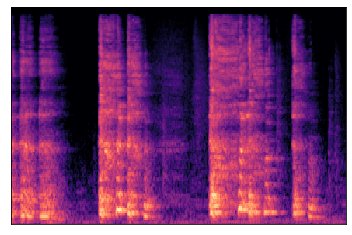

In [8]:
for label in unique_labels:
    print ("Proccesing {} audio files".format(label))
    current_label_meta_data = meta_data[meta_data.is_cough == label]
    datasets = _train_test_split(current_label_meta_data.filename, train_pct=0.8)
    for dataset_split, audio_files in datasets.items():
        for filename in audio_files:
            directory_path = dataset_dir + '/audio/'
            save_melspectrogram(directory_path, filename, dataset_split, label, sampling_rate=44100)